In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [9]:
DATA_DIR = "../data"

train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
features = pd.read_csv(os.path.join(DATA_DIR, "features.csv"))
stores = pd.read_csv(os.path.join(DATA_DIR, "stores.csv"))

print("train shape:", train.shape)
print("features shape:", features.shape)
print("stores shape:", stores.shape)

train shape: (421570, 5)
features shape: (8190, 12)
stores shape: (45, 3)


In [ ]:
# Merge datasets
# Merge train with features and stores
df= train.merge(features, on=['Store', 'Date'], how='left')
df= df.merge(stores, on='Store', how='left')
df['Date'] = pd.to_datetime(df['Date'])

print("df shape:", df.shape)
df.head()

df shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
# Check for missing values in the dataset
missing = df.isnull().sum()
print("Missing values in each column:")
print(missing[missing > 0])

# Replace market and markdown values with 0 if they are NaN


markdown_cols = [col for col in df.columns if 'markdown' in col.lower()]
df[markdown_cols] = df[markdown_cols].fillna(0)


Missing values in each column:
Series([], dtype: int64)


In [23]:
# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# ISO calendar week (returns a Series, so .astype(int) is optional)
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Convert IsHoliday from bool to 0/1 (note: source is 'IsHoliday')
df['IsHoliday_y'] = df['IsHoliday_y'].astype(int)

# Sort by Store, Dept, Date (important for time series modeling)
df.sort_values(["Store", "Dept", "Date"], inplace=True)





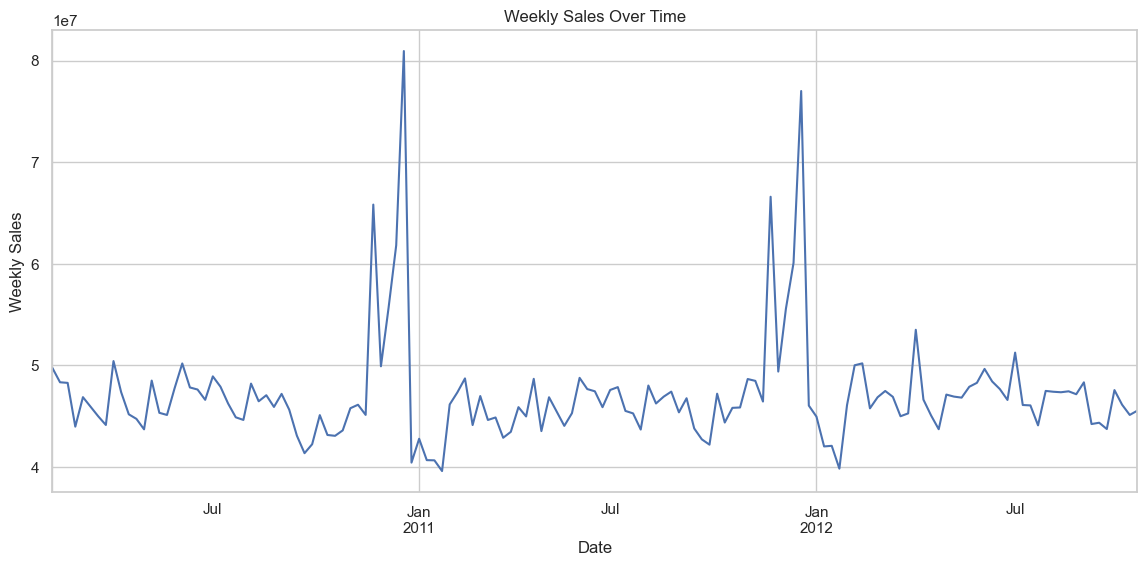

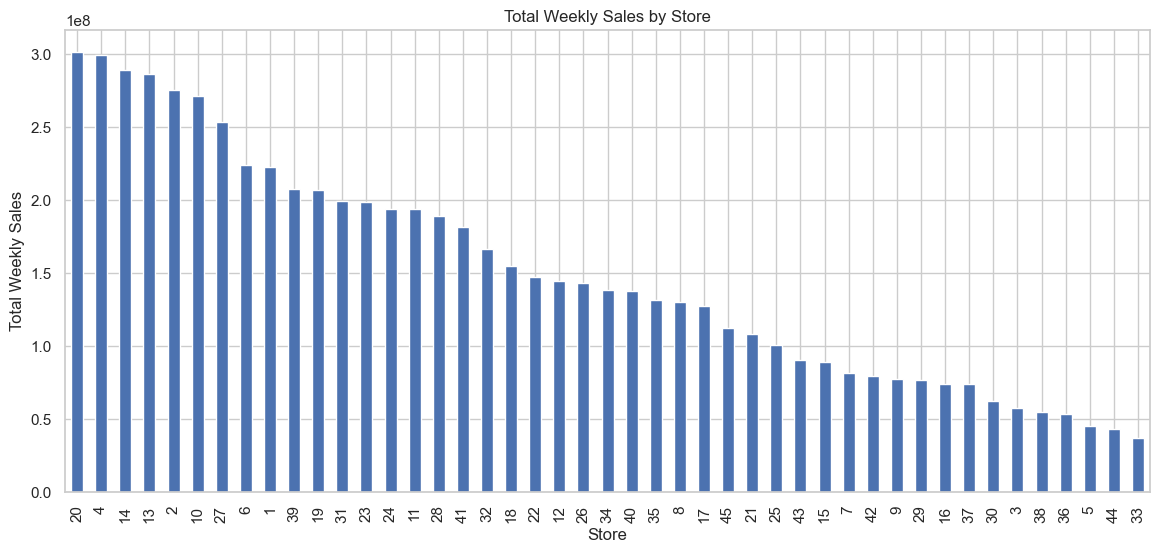

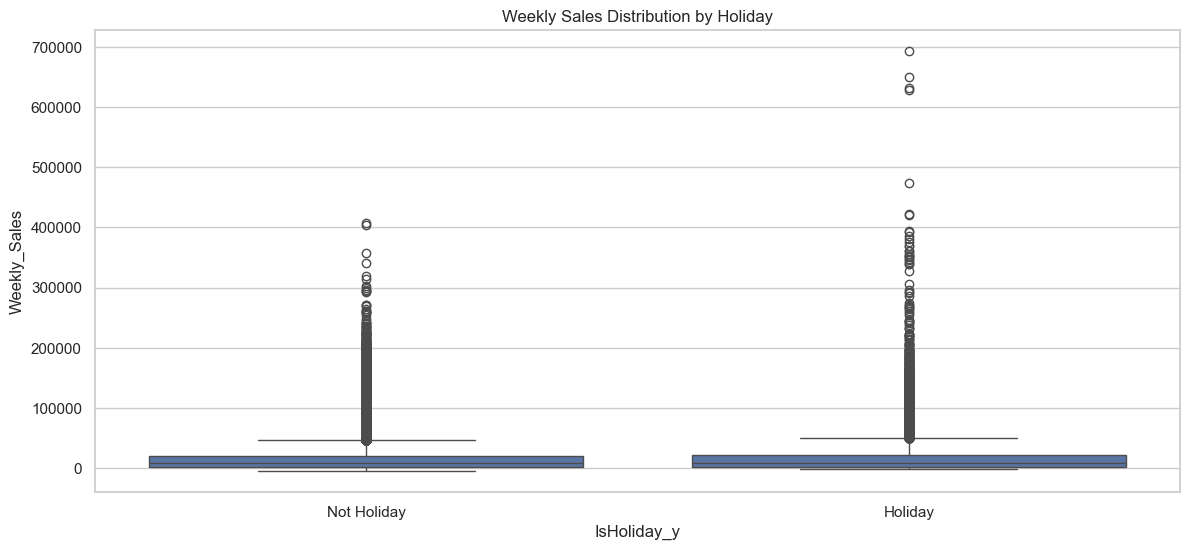

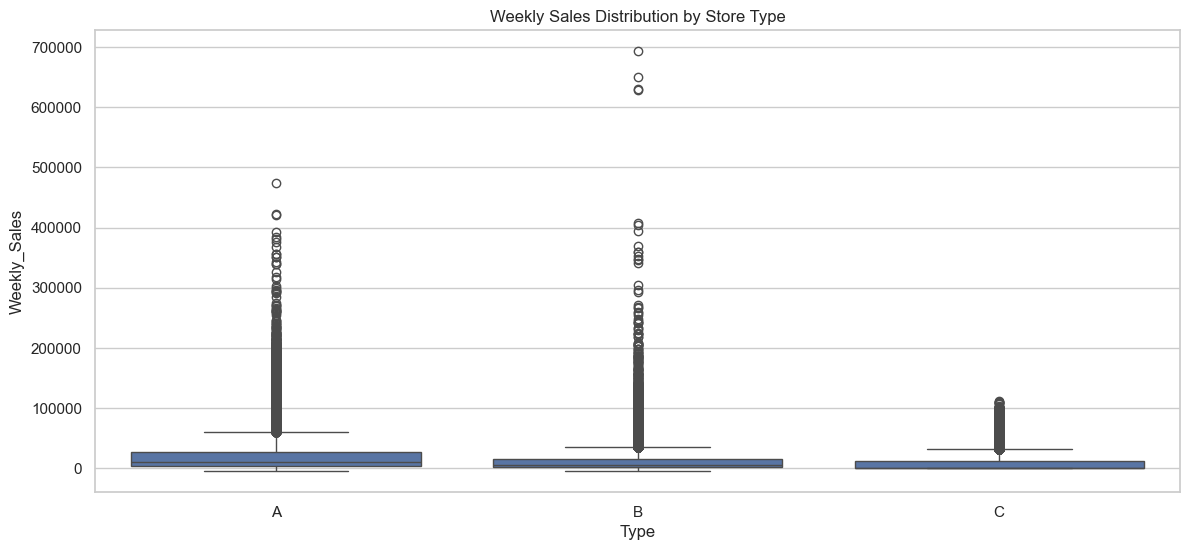

In [29]:
plt.figure(figsize=(14, 6))
df. groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()
# Plotting the distribution of weekly sales

plt.figure(figsize=(14, 6))
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales.plot(kind='bar')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()
# Plotting the distribution of weekly sales by store

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x = 'IsHoliday_y', y = 'Weekly_Sales')
plt.title('Weekly Sales Distribution by Holiday')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
plt.show()
# Plotting the distribution of weekly sales by holiday

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Type", y="Weekly_Sales")
plt.title('Weekly Sales Distribution by Store Type')
plt.show()



In [30]:
CLEANED_DATA_DIR = "../data/cleaned_sales.csv"

df.to_csv(CLEANED_DATA_DIR, index=False)
print(f"Cleaned data saved to {CLEANED_DATA_DIR}")

Cleaned data saved to ../data/cleaned_sales.csv
